In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sc = StandardScaler()

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DSS_Pipeline/brfss2020.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
completely_empty = [feature for feature in df.columns if df[feature].isnull().sum() == df.shape[0]]

exp1 = df.fillna(-1)
exp1 = exp1.drop(columns=completely_empty)

exp1["CNCRDIFF"] = exp1["CNCRDIFF"].apply(lambda x: 1 if x in [1,2,3] else 0)
exp1 = exp1.drop(columns=["CNCRAGE", "CNCRTYP1", "CSRVTRT3", "CSRVDOC1", "CSRVSUM", "CSRVRTRN", "CSRVINST", "CSRVINSR", "CSRVDEIN", "CSRVCLIN", 
                   "CSRVPAIN", "CSRVCTL2", "CHCSCNCR", "CHCOCNCR"])
x_train, x_test, y_train, y_test = train_test_split(exp1.drop(columns=["CNCRDIFF"]),
                                                    exp1["CNCRDIFF"],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=exp1["CNCRDIFF"])

x_train_small = pd.concat([x_train[y_train == 0].sample(2*18170), x_train[y_train == 1].sample(18170)])
y_train_small = [0]*2*18170 + [1]*18170

x_train_scale = sc.fit_transform(x_train_small)
x_test_scale = sc.fit_transform(x_test)

In [3]:
clf_cancer = DecisionTreeClassifier(max_depth=9, random_state=42, class_weight="balanced")
clf_cancer.fit(x_train, y_train)

mlp_clf_cancer = MLPClassifier(hidden_layer_sizes =(7,) , max_iter = 40 ,random_state=42)
mlp_clf_cancer.fit(x_train_scale, y_train_small)

rf_clf_cancer = RandomForestClassifier(max_depth=10, random_state = 42, class_weight = "balanced")
rf_clf_cancer.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [4]:
completely_empty = [feature for feature in df.columns if df[feature].isnull().sum() == df.shape[0]]

exp1 = df.fillna(-1)
exp1 = exp1.drop(columns=completely_empty)

exp1["DIABETE4"] = exp1["DIABETE4"].apply(lambda x: 1 if x in [1] else 0)
exp1 = exp1.drop(columns=["DIABAGE3", "RENTHOM1", "PREDIAB1", "_AGE80","GENHLTH"])

x_train, x_test, y_train, y_test = train_test_split(exp1.drop(columns=["DIABETE4"]),
                                                    exp1["DIABETE4"],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=exp1["DIABETE4"])

x_train_small = pd.concat([x_train[y_train == 0].sample(2*18170), x_train[y_train == 1].sample(18170)])
y_train_small = [0]*2*18170 + [1]*18170

x_train_scale = sc.fit_transform(x_train_small)
x_test_scale = sc.fit_transform(x_test)

In [5]:
clf_diabetes = DecisionTreeClassifier(max_depth=9, random_state=42, class_weight="balanced")
clf_diabetes.fit(x_train, y_train)

mlp_clf_diabetes = MLPClassifier(hidden_layer_sizes =(7,) , max_iter = 40 ,random_state=42)
mlp_clf_diabetes.fit(x_train_scale, y_train_small)

rf_clf_diabetes = RandomForestClassifier(max_depth=10, random_state = 42, class_weight = "balanced")
rf_clf_diabetes.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [6]:
# exp1 - Asthma prediction with decision tree
completely_empty = [feature for feature in df.columns if df[feature].isnull().sum() == df.shape[0]]

exp1 = df.fillna(-1)
exp1 = exp1.drop(columns=completely_empty)

exp1["ASTHMA3"] = exp1["ASTHMA3"].apply(lambda x: 1 if x == 1 else 0)
exp1 = exp1.drop(columns=['ASTHNOW', '_LTASTH1', '_ASTHMS1', '_CASTHM1'])
x_train, x_test, y_train, y_test = train_test_split(exp1.drop(columns=["ASTHMA3"]),
                                                    exp1["ASTHMA3"],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=exp1["ASTHMA3"])

x_train_small = pd.concat([x_train[y_train == 0].sample(2*18170), x_train[y_train == 1].sample(18170)])
y_train_small = [0]*2*18170 + [1]*18170

x_train_scale = sc.fit_transform(x_train_small)
x_test_scale = sc.fit_transform(x_test)

In [7]:
clf_asthma = DecisionTreeClassifier(max_depth=9, random_state=42, class_weight="balanced")
clf_asthma.fit(x_train, y_train)

mlp_clf_asthma = MLPClassifier(hidden_layer_sizes =(7,) , max_iter = 40 ,random_state=42)
mlp_clf_asthma.fit(x_train_scale, y_train_small)

rf_clf_asthma = RandomForestClassifier(max_depth=10, random_state = 42, class_weight = "balanced")
rf_clf_asthma.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [9]:
completely_empty = [feature for feature in df.columns if df[feature].isnull().sum() == df.shape[0]]

exp1 = df.fillna(-1)
exp1 = exp1.drop(columns=completely_empty)

exp1["CNCRDIFF"] = exp1["CNCRDIFF"].apply(lambda x: 1 if x in [1,2,3] else 0)
exp1 = exp1.drop(columns=["CNCRAGE", "CNCRTYP1", "CSRVTRT3", "CSRVDOC1", "CSRVSUM", "CSRVRTRN", "CSRVINST", "CSRVINSR", "CSRVDEIN", "CSRVCLIN", 
                   "CSRVPAIN", "CSRVCTL2", "CHCSCNCR", "CHCOCNCR", "CNCRDIFF"])

dtree_train_pred_cancer = clf_cancer.predict_proba(exp1)
mlp_train_pred_cancer = mlp_clf_cancer.predict_proba(sc.fit_transform(exp1))
rf_train_pred_cancer = rf_clf_cancer.predict_proba(exp1)

exp1 = df.fillna(-1)
exp1 = exp1.drop(columns=completely_empty)

exp1["DIABETE4"] = exp1["DIABETE4"].apply(lambda x: 1 if x in [1] else 0)
exp1 = exp1.drop(columns=["DIABAGE3", "RENTHOM1", "PREDIAB1", "_AGE80", "GENHLTH", "DIABETE4"])

dtree_train_pred_diabetes = clf_diabetes.predict_proba(exp1)
mlp_train_pred_diabetes = mlp_clf_diabetes.predict_proba(sc.fit_transform(exp1))
rf_train_pred_diabetes = rf_clf_diabetes.predict_proba(exp1)

exp1 = df.fillna(-1)
exp1 = exp1.drop(columns=completely_empty)

exp1["ASTHMA3"] = exp1["ASTHMA3"].apply(lambda x: 1 if x == 1 else 0)
exp1 = exp1.drop(columns=['ASTHNOW', '_LTASTH1', '_ASTHMS1', '_CASTHM1', "ASTHMA3"])

dtree_train_pred_asthma = clf_asthma.predict_proba(exp1)
mlp_train_pred_asthma = mlp_clf_asthma.predict_proba(sc.fit_transform(exp1))
rf_train_pred_asthma = rf_clf_asthma.predict_proba(exp1)

In [10]:
health_score = dtree_train_pred_cancer + mlp_train_pred_cancer + rf_train_pred_cancer + \
                dtree_train_pred_diabetes + mlp_train_pred_diabetes + rf_train_pred_diabetes + \
                dtree_train_pred_asthma + mlp_train_pred_asthma + rf_train_pred_asthma

health_score = health_score/9

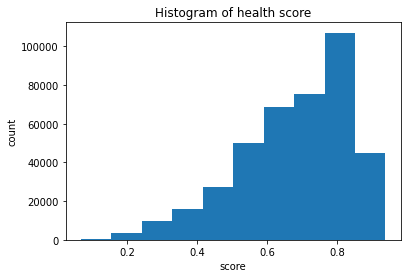

In [14]:
plt.hist(health_score[:, 0])
plt.title("Histogram of health score")
plt.xlabel("score")
plt.ylabel("count")
plt.show()